# 第3部　Pythonによるデータ分析｜Pythonで学ぶ統計学入門

## 5章　標本の統計量の性質

### ライブラリのインポート

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

In [2]:
# 平均4、標準偏差0.8の正規分布を使いまわす
population = stats.norm(loc = 4, scale = 0.8)

### 標本平均を何度も計算してみる

In [3]:
# 平均値を格納する入れ物
sample_mean_array = np.zeros(10000)

In [5]:
# 「データを10個選んで平均値を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [6]:
sample_mean_array

array([ 3.922,  3.864,  4.07 , ...,  4.136,  4.575,  4.099])

### 標本平均の平均値は、母平均に近い

In [7]:
# 標本平均の平均値
sp.mean(sample_mean_array)

4.004

In [8]:
# 標本平均の標準偏差
sp.std(sample_mean_array, ddof = 1)

0.251

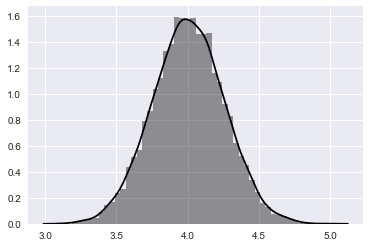

In [9]:
# 標本平均の分布
sns.distplot(sample_mean_array, color = 'black')

### サンプルサイズ大なら、標本平均は母平均に近い

In [10]:
# サンプルサイズを10～100010までの範囲で100区切りで変化させる
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
# 「標本平均」を格納する入れ物
sample_mean_array_size = np.zeros(len(size_array))

In [12]:
# 「標本平均を求める」試行を、サンプルサイズを変えながら何度も実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

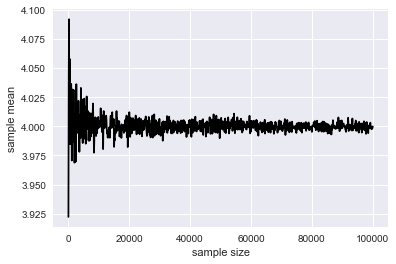

In [13]:
plt.plot(size_array, sample_mean_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 標本平均を何度も計算する関数を作る

In [14]:
# 標本平均を何度も計算する関数
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [15]:
# 動作確認。
# 「データを10個選んで平均値を求める」試行を10000回繰り返した結果をさらに平均する
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004

### サンプルサイズを変えた時の標本平均の分布

In [17]:
np.random.seed(1)
# サンプルサイズ10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# サンプルサイズ20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# サンプルサイズ30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 結合
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 結果の表示
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


In [18]:
sns.violinplot(x = "size", y = "sample_mean", 
               data = sim_result, color = 'gray')

### 標本平均の標準偏差は母標準偏差よりも小さくなる

In [20]:
# サンプルサイズを2～100までの範囲で2区切りで変化させる
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [21]:
# 「標本平均の標準偏差」を格納する入れ物
sample_mean_std_array = np.zeros(len(size_array))

In [23]:
# 「標本平均の標準偏差を計算する」試行を、サンプルサイズを変えながら何度も実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], 
                                   n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, 
                                      ddof = 1)

In [24]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 標準誤差

In [25]:
# 標本平均の理論上の値：標準誤差
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([ 0.566,  0.4  ,  0.327,  0.283,  0.253,  0.231,  0.214,  0.2  ,
        0.189,  0.179,  0.171,  0.163,  0.157,  0.151,  0.146,  0.141,
        0.137,  0.133,  0.13 ,  0.126,  0.123,  0.121,  0.118,  0.115,
        0.113,  0.111,  0.109,  0.107,  0.105,  0.103,  0.102,  0.1  ,
        0.098,  0.097,  0.096,  0.094,  0.093,  0.092,  0.091,  0.089,
        0.088,  0.087,  0.086,  0.085,  0.084,  0.083,  0.083,  0.082,
        0.081,  0.08 ])

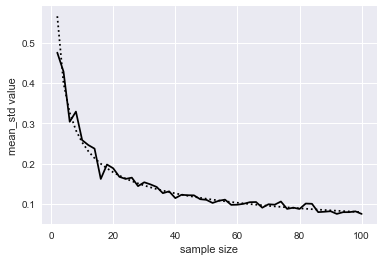

In [26]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 標本分散の平均値は、母分散からずれている

In [27]:
# 「標本分散」を格納する入れ物
sample_var_array = np.zeros(10000)

In [28]:
# 「データを10個選んで標本分散を求める」試行を10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

In [29]:
# 標本分散の平均値
sp.mean(sample_var_array)

0.575

### 不偏分散を使うと、バイアスがなくなる

In [33]:
# 「不偏分散」を格納する入れ物
unbias_var_array = np.zeros(10000)
# 「データを10個選んで不偏分散を求める」試行を
# 10000回繰り返す
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)
# 不偏分散の平均値
sp.mean(unbias_var_array)

0.639

### サンプルサイズを増やすと、不偏分散は母分散に近づく

In [34]:
# サンプルサイズを10～100010までの範囲で100区切りで変化させる
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [35]:
# 「不偏分散」を格納する入れ物
unbias_var_array_size = np.zeros(len(size_array))

In [36]:
# 「不偏分散を求める」試行を、サンプルサイズを変えながら何度も実行
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

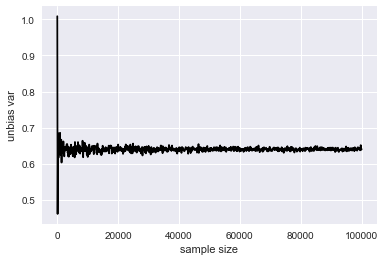

In [37]:
plt.plot(size_array, unbias_var_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 補足：中心極限定理

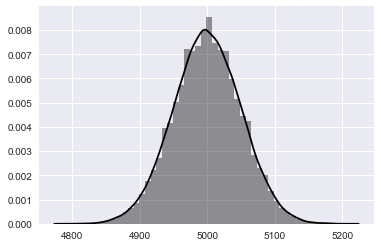

In [40]:
# サンプルサイズと試行回数
n_size  = 10000
n_trial = 50000
# 表ならば1、裏ならば0を表す
coin = np.array([0,1])
# 表が出た回数
count_coin = np.zeros(n_trial)
# コインをn_size回投げる試行をn_trial回行う
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(
        np.random.choice(coin, size = n_size, 
                         replace = True))
# ヒストグラムを描く
sns.distplot(count_coin, color = 'black')